# Supplier Performance Analysis
- Week05
- dataset: PurchasesFINAL12312016.csv

## Pre-processing

#### Load dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px



In [2]:
data = pd.read_csv('./data/PurchasesFINAL12312016.csv')
data.head()


,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
0,69_MOUNTMEND_8412,69,8412,Tequila Ocho Plata Fresno,750mL,105,ALTAMAR BRANDS LLC,8124,2015-12-21,2016-01-02,2016-01-04,2016-02-16,35.71,6,214.26,1
1,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,4,37.40,1
2,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-02,2016-01-07,2016-02-21,9.41,5,47.05,1
3,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,6,56.10,1
4,76_DONCASTER_2034,76,2034,Glendalough Double Barrel,750mL,388,ATLANTIC IMPORTING COMPANY,8169,2015-12-24,2016-01-02,2016-01-09,2016-02-16,21.32,5,106.60,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2372474 entries, 0 to 2372473
Data columns (total 16 columns):
 #   Column          Dtype  
---  ------          -----  
 0   InventoryId     object 
 1   Store           int64  
 2   Brand           int64  
 3   Description     object 
 4   Size            object 
 5   VendorNumber    int64  
 6   VendorName      object 
 7   PONumber        int64  
 8   PODate          object 
 9   ReceivingDate   object 
 10  InvoiceDate     object 
 11  PayDate         object 
 12  PurchasePrice   float64
 13  Quantity        int64  
 14  Dollars         float64
 15  Classification  int64  
dtypes: float64(2), int64(6), object(8)
memory usage: 289.6+ MB


### Change Dtype

In [17]:
df = data.copy()

In [18]:
pd.to_datetime(df['PODate'])

0         2015-12-21
1         2015-12-22
2         2015-12-22
3         2015-12-22
4         2015-12-24
             ...    
2372469   2016-12-19
2372470   2016-12-19
2372471   2016-12-19
2372472   2016-12-19
2372473   2016-12-19
Name: PODate, Length: 2372474, dtype: datetime64[ns]

#### Change to DateTime
-  Multiple columns: Apply pd.to_datetime to each column in the list

In [19]:
date_col = ['PODate', 'ReceivingDate', 'InvoiceDate','PayDate']
df[date_col] = df[date_col].apply(pd.to_datetime)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2372474 entries, 0 to 2372473
Data columns (total 16 columns):
 #   Column          Dtype         
---  ------          -----         
 0   InventoryId     object        
 1   Store           int64         
 2   Brand           int64         
 3   Description     object        
 4   Size            object        
 5   VendorNumber    int64         
 6   VendorName      object        
 7   PONumber        int64         
 8   PODate          datetime64[ns]
 9   ReceivingDate   datetime64[ns]
 10  InvoiceDate     datetime64[ns]
 11  PayDate         datetime64[ns]
 12  PurchasePrice   float64       
 13  Quantity        int64         
 14  Dollars         float64       
 15  Classification  int64         
dtypes: datetime64[ns](4), float64(2), int64(6), object(4)
memory usage: 289.6+ MB


### Change to Str

In [21]:
str_col = ['Store','Brand','Classification','VendorNumber','PONumber']
df[str_col] = df[str_col].astype(str)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2372474 entries, 0 to 2372473
Data columns (total 16 columns):
 #   Column          Dtype         
---  ------          -----         
 0   InventoryId     object        
 1   Store           object        
 2   Brand           object        
 3   Description     object        
 4   Size            object        
 5   VendorNumber    object        
 6   VendorName      object        
 7   PONumber        object        
 8   PODate          datetime64[ns]
 9   ReceivingDate   datetime64[ns]
 10  InvoiceDate     datetime64[ns]
 11  PayDate         datetime64[ns]
 12  PurchasePrice   float64       
 13  Quantity        int64         
 14  Dollars         float64       
 15  Classification  object        
dtypes: datetime64[ns](4), float64(2), int64(1), object(9)
memory usage: 289.6+ MB


### Feature Engineering

#### 1. Lead Time
- Lead Time=Invoice Date−PO Delivery Date

In [23]:
df['LeadTime'] = df['InvoiceDate'] - df['ReceivingDate']

In [24]:
df[['InvoiceDate', 'ReceivingDate', 'LeadTime']].head()

,InvoiceDate,ReceivingDate,LeadTime
0,2016-01-04,2016-01-02,2 days
1,2016-01-07,2016-01-01,6 days
2,2016-01-07,2016-01-02,5 days
3,2016-01-07,2016-01-01,6 days
4,2016-01-09,2016-01-02,7 days


In [25]:
df['LeadTime'].describe()

count                      2372474
mean     8 days 20:56:30.716694893
std      2 days 23:24:52.036174004
min                1 days 00:00:00
25%                7 days 00:00:00
50%                9 days 00:00:00
75%               11 days 00:00:00
max               15 days 00:00:00
Name: LeadTime, dtype: object

#### 2. Order Time(Lead Time)
- Order Time (Lead Time)=PO Delivery Date−Purchase Date

In [26]:
df['OrderTime'] = df['ReceivingDate'] - df['PODate']

In [27]:
df[['PODate','ReceivingDate','OrderTime']].head()

,PODate,ReceivingDate,OrderTime
0,2015-12-21,2016-01-02,12 days
1,2015-12-22,2016-01-01,10 days
2,2015-12-22,2016-01-02,11 days
3,2015-12-22,2016-01-01,10 days
4,2015-12-24,2016-01-02,9 days


In [28]:
df['OrderTime'].describe()

count                      2372474
mean     7 days 14:53:51.844563944
std      2 days 05:00:48.065950647
min                3 days 00:00:00
25%                6 days 00:00:00
50%                8 days 00:00:00
75%                9 days 00:00:00
max               14 days 00:00:00
Name: OrderTime, dtype: object

"""Red Flags:
Invoice Issued Before Delivery: If the invoice date is earlier than the delivery date, this could be a data entry error or indicate that the invoice was issued prematurely (before goods/services were delivered), which could be a red flag for some businesses"""

In [29]:
((df['InvoiceDate'] - df['ReceivingDate']) < pd.Timedelta(0)).value_counts()

False    2372474
Name: count, dtype: int64

#### 3. Payment Lead Time
- Payment Lead Time=PayDate−InvoiceDate

In [30]:
df['PaymentLT'] = (df['PayDate'] - df['InvoiceDate']).dt.days


In [31]:
df['PaymentLT'].describe()

count    2.372474e+06
mean     3.565881e+01
std      6.062932e+00
min      2.300000e+01
25%      3.100000e+01
50%      3.600000e+01
75%      4.100000e+01
max      4.800000e+01
Name: PaymentLT, dtype: float64

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2372474 entries, 0 to 2372473
Data columns (total 19 columns):
 #   Column          Dtype          
---  ------          -----          
 0   InventoryId     object         
 1   Store           object         
 2   Brand           object         
 3   Description     object         
 4   Size            object         
 5   VendorNumber    object         
 6   VendorName      object         
 7   PONumber        object         
 8   PODate          datetime64[ns] 
 9   ReceivingDate   datetime64[ns] 
 10  InvoiceDate     datetime64[ns] 
 11  PayDate         datetime64[ns] 
 12  PurchasePrice   float64        
 13  Quantity        int64          
 14  Dollars         float64        
 15  Classification  object         
 16  LeadTime        timedelta64[ns]
 17  OrderTime       timedelta64[ns]
 18  PaymentLT       int64          
dtypes: datetime64[ns](4), float64(2), int64(2), object(9), timedelta64[ns](2)
memory usage: 343.9+ MB


##### Change Dtypes: Timedelta -> integer

In [33]:
df['LeadTime'].dt.days

0           2
1           6
2           5
3           6
4           7
           ..
2372469    12
2372470    13
2372471    14
2372472    14
2372473    12
Name: LeadTime, Length: 2372474, dtype: int64

### Text Split - Inventory ID

In [34]:
df['InventoryId']

0             69_MOUNTMEND_8412
1              30_CULCHETH_5255
2             34_PITMERDEN_5215
3           1_HARDERSFIELD_5255
4             76_DONCASTER_2034
                   ...         
2372469       49_GARIGILL_22298
2372470    1_HARDERSFIELD_19556
2372471     66_EANVERNESS_22297
2372472      69_MOUNTMEND_19557
2372473      55_DRY GULCH_22298
Name: InventoryId, Length: 2372474, dtype: object

#### Split by '_'

In [35]:
#### Split by '_' and expand into separate columns
df['InventoryId'].str.split('_', expand=True)

,0,1,2
0,69,MOUNTMEND,8412
1,30,CULCHETH,5255
2,34,PITMERDEN,5215
3,1,HARDERSFIELD,5255
4,76,DONCASTER,2034
...,...,...,...
2372469,49,GARIGILL,22298
2372470,1,HARDERSFIELD,19556
2372471,66,EANVERNESS,22297
2372472,69,MOUNTMEND,19557


In [36]:
df[['Split_1', 'InventoryCategory', 'Split_3']] = df['InventoryId'].str.split('_', expand=True)

In [37]:
df.head()

,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,...,PurchasePrice,Quantity,Dollars,Classification,LeadTime,OrderTime,PaymentLT,Split_1,InventoryCategory,Split_3
0,69_MOUNTMEND_8412,69,8412,Tequila Ocho Plata Fresno,750mL,105,ALTAMAR BRANDS LLC,8124,2015-12-21,2016-01-02,...,35.71,6,214.26,1,2 days,12 days,43,69,MOUNTMEND,8412
1,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,...,9.35,4,37.40,1,6 days,10 days,45,30,CULCHETH,5255
2,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-02,...,9.41,5,47.05,1,5 days,11 days,45,34,PITMERDEN,5215
3,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,...,9.35,6,56.10,1,6 days,10 days,45,1,HARDERSFIELD,5255
4,76_DONCASTER_2034,76,2034,Glendalough Double Barrel,750mL,388,ATLANTIC IMPORTING COMPANY,8169,2015-12-24,2016-01-02,...,21.32,5,106.60,1,7 days,9 days,38,76,DONCASTER,2034


#### Drop columns

In [38]:
# Drop columns

df = df.drop(columns=['Split_1', 'Split_3'])

In [39]:
df.columns

Index(['InventoryId', 'Store', 'Brand', 'Description', 'Size', 'VendorNumber',
       'VendorName', 'PONumber', 'PODate', 'ReceivingDate', 'InvoiceDate',
       'PayDate', 'PurchasePrice', 'Quantity', 'Dollars', 'Classification',
       'LeadTime', 'OrderTime', 'PaymentLT', 'InventoryCategory'],
      dtype='object')

In [40]:
df['InventoryCategory'].value_counts()

#Find strange 1726 with ''

InventoryCategory
DONCASTER       217917
MOUNTMEND       182223
EANVERNESS      166601
GOULCREST       132805
HORNSEY         100801
                 ...  
LEWES             6666
AYLESBURY         5379
TYWARDREATH       4087
KNIFE'S EDGE      3974
                  1726
Name: count, Length: 69, dtype: int64

#### Check Null value

In [41]:
df['InventoryCategory'].isna().value_counts()

InventoryCategory
False    2372474
Name: count, dtype: int64

In [42]:
#Check '' value 
(df['InventoryCategory'] =='').value_counts()

InventoryCategory
False    2370748
True        1726
Name: count, dtype: int64

In [43]:
df[df['InventoryCategory'] == ''][['InventoryId','InventoryCategory']]

,InventoryId,InventoryCategory
983466,46__5255,
983474,46__5215,
983510,46__3472,
983534,46__4075,
983559,46__4179,
...,...,...
1544209,81__23289,
1544249,81__23325,
1544319,81__23286,
1544402,81__23324,


#### Drop '' empty string value

In [44]:
df1 = df.copy()

In [45]:
#Drop df['InventoryCategory'] == '' ; empty string 

df1 = df[df['InventoryCategory'] != '']

In [46]:
print(df.shape, df1.shape)

(2372474, 20) (2370748, 20)


## EDA

### Vendor

In [47]:
df1.columns

Index(['InventoryId', 'Store', 'Brand', 'Description', 'Size', 'VendorNumber',
       'VendorName', 'PONumber', 'PODate', 'ReceivingDate', 'InvoiceDate',
       'PayDate', 'PurchasePrice', 'Quantity', 'Dollars', 'Classification',
       'LeadTime', 'OrderTime', 'PaymentLT', 'InventoryCategory'],
      dtype='object')

#### Summary Statistics: Group by

In [61]:

df1.groupby('VendorNumber').agg({
    'LeadTime': ['mean', 'min', 'max'],
    'OrderTime': ['mean', 'min', 'max'],
    'PaymentLT': ['mean',  'min', 'max']
})

LeadTime                 \
                                  mean    min     max   
VendorNumber                                            
10000        9 days 01:07:53.180038156 1 days 15 days   
1003         8 days 19:06:07.346938775 3 days 15 days   
10050        9 days 04:08:43.636363636 3 days 15 days   
105          9 days 00:25:15.789473684 2 days 15 days   
10754        8 days 14:16:40.945557908 1 days 15 days   
...                                ...    ...     ...   
9751         7 days 16:43:38.181818181 2 days 13 days   
9815         9 days 08:24:30.343657191 1 days 15 days   
9819         8 days 07:18:12.627447033 1 days 15 days   
98450        8 days 19:43:54.903782349 1 days 15 days   
99166        8 days 12:52:40.975609756 3 days 14 days   

                             OrderTime                 PaymentLT          
                                  mean    min     max       mean min max  
VendorNumber                                                              
10000        7 days 04:47:27.032834622 3 days 14 days  35.360227  25  47  
1003         7 days 20:04:53.877551020 4 days 12 days  33.816327  24  47  
10050        8 days 03:31:38.181818181 3 days 13 days  35.816667  23  48  
105          7 days 13:53:41.052631579 3 days 12 days  36.210526  25  45  
10754        7 days 06:30:03.706819038 3 days 14 days  35.821156  24  48  
...                                ...    ...     ...        ...  ..  ..  
9751         8 days 19:38:10.909090909 5 days 12 days  37.757576  26  48  
9815         7 days 15:13:36.529486635 3 days 14 days  35.400500  23  46  
9819         7 days 07:15:33.923808565 3 days 14 days  35.604575  23  48  
98450        7 days 02:56:46.502986065 3 days 14 days  35.007963  23  47  
99166        8 days 11:42:26.341463414 3 days 12 days  35.756098  27  48  

[126 rows x 9 columns]

In [62]:
summary_vendor = df1.groupby('VendorNumber').agg({
                'LeadTime': ['mean', 'min', 'max'],
                'OrderTime': ['mean', 'min', 'max'],
                'PaymentLT': ['mean',  'min', 'max']
            })


##### Top5 Vendor sorted by OrderTime

In [65]:
#ascending=False
summary_vendor.sort_values(('OrderTime', 'mean'), ascending=False).head(5)

LeadTime                  \
                                  mean     min     max   
VendorNumber                                             
201359                 9 days 00:00:00  9 days  9 days   
54                     7 days 00:00:00  7 days  7 days   
4901                  11 days 00:00:00 11 days 11 days   
2            9 days 07:23:04.615384615  4 days 11 days   
90059        7 days 10:21:49.090909090  2 days 13 days   

                             OrderTime                  PaymentLT          
                                  mean     min     max       mean min max  
VendorNumber                                                               
201359                13 days 00:00:00 13 days 13 days  38.000000  38  38  
54                    10 days 00:00:00 10 days 10 days  44.000000  44  44  
4901                  10 days 00:00:00 10 days 10 days  41.000000  41  41  
2            9 days 14:46:09.230769230  7 days 11 days  31.923077  27  48  
90059        9 days 07:38:10.909090909  5 days 13 days  32.727273  29  40

In [66]:
#ascending=True
summary_vendor.sort_values(('OrderTime', 'mean'), ascending=True).head(5)


LeadTime                  \
                                   mean     min     max   
VendorNumber                                              
9099                   13 days 00:00:00 13 days 13 days   
3951         12 days 09:25:42.857142857  6 days 15 days   
5083                    6 days 14:24:00  4 days  8 days   
1650          8 days 07:43:31.158798283  3 days 15 days   
1703                    7 days 11:12:00  2 days 14 days   

                             OrderTime                 PaymentLT          
                                  mean    min     max       mean min max  
VendorNumber                                                              
9099                   5 days 00:00:00 5 days  5 days  31.000000  31  31  
3951         5 days 07:42:51.428571428 3 days  9 days  26.642857  23  42  
5083                   5 days 22:48:00 4 days 12 days  42.100000  32  47  
1650         6 days 22:45:50.214592274 3 days 12 days  36.613734  27  47  
1703                   7 days 00:00:00 3 days 12 days  39.266667  27  47

__Observation__: 
- Good performance Vendor(LeadTime) -> 9099, 3951, 5083, 1650, 1703 ( mean: 5~ 7 days)
- Bad performance vendor(LeadTime) -> 201359, 54, 4901, 2, 90059 (mean: 9~13 days)

### Store

##### Top5 Vendor sorted by PaymentLT

In [68]:
summary_store = df1.groupby('Store').agg({
                'LeadTime': ['mean', 'min', 'max'],
                'OrderTime': ['mean', 'min', 'max'],
                'PaymentLT': ['mean',  'min', 'max']
            })


In [69]:
#ascending=False
summary_store.sort_values(('PaymentLT', 'mean'), ascending=False).head(5)

LeadTime                                OrderTime  \
                            mean    min     max                      mean   
Store                                                                       
3     10 days 21:43:39.269102990 3 days 15 days 5 days 16:14:21.129568106   
46     8 days 17:44:45.686322485 1 days 15 days 7 days 14:36:36.819182774   
64     9 days 03:41:03.524003064 1 days 15 days 7 days 08:42:54.221274611   
36     7 days 21:49:05.454545454 2 days 15 days 8 days 12:39:05.994599460   
5      7 days 00:36:32.893401015 1 days 15 days 9 days 09:03:07.223446030   

                      PaymentLT          
         min     max       mean min max  
Store                                    
3     3 days 13 days  35.873754  23  48  
46    3 days 13 days  35.810374  23  48  
64    3 days 14 days  35.795016  23  48  
36    3 days 14 days  35.776178  23  48  
5     3 days 13 days  35.773393  23  48

In [70]:
summary_store.sort_values(('PaymentLT', 'mean'), ascending=True).head(5)

LeadTime                                OrderTime  \
                           mean    min     max                      mean   
Store                                                                      
81    8 days 19:10:20.424714544 2 days 15 days 7 days 13:57:37.859353324   
78    8 days 19:54:05.417236662 1 days 15 days 7 days 16:18:42.845417236   
50    8 days 23:49:28.274514592 1 days 15 days 7 days 12:10:51.508120649   
22    8 days 21:44:19.644128113 1 days 15 days 7 days 14:49:14.306049822   
28    9 days 17:22:13.519493072 2 days 15 days 6 days 18:32:17.063688110   

                      PaymentLT          
         min     max       mean min max  
Store                                    
81    3 days 14 days  34.848896  23  48  
78    3 days 13 days  35.465971  23  48  
50    3 days 14 days  35.532528  23  48  
22    3 days 14 days  35.559075  23  48  
28    3 days 13 days  35.564601  23  48

__Observation__: No significance difference ( mean: 34 days, min:23, max:48) -> Payment term 이 존재하기 때문에 Store별 큰 차이가 없음 

### InventoryCategory

In [83]:
summary_inventoryCat = df1.groupby('InventoryCategory').agg({
                'LeadTime': ['mean', 'min', 'max'],
                'OrderTime': ['mean', 'min', 'max'],
                'PaymentLT': ['mean',  'min', 'max']
            })


In [87]:
summary_inventoryCat.sort_values(('OrderTime', 'mean'), ascending=True).head(5)

LeadTime                 \
                                       mean    min     max   
InventoryCategory                                            
SWORDBREAK        9 days 22:17:00.679576178 3 days 15 days   
BROMWICH          9 days 18:42:36.029975020 1 days 15 days   
KILMARNOCK        9 days 17:45:50.957230142 1 days 15 days   
BLACKPOOL         9 days 17:46:10.977235870 1 days 15 days   
BREDWARDINE       9 days 14:57:48.983806353 1 days 15 days   

                                  OrderTime                 PaymentLT          
                                       mean    min     max       mean min max  
InventoryCategory                                                              
SWORDBREAK        6 days 13:24:34.461088783 4 days 13 days  35.706887  23  48  
BROMWICH          6 days 17:11:08.442964196 3 days 14 days  35.629975  23  48  
KILMARNOCK        6 days 18:14:57.433808554 3 days 13 days  35.626578  23  48  
BLACKPOOL         6 days 18:37:49.109255811 3 days 14 days  35.644183  23  48  
BREDWARDINE       6 days 19:47:52.809343790 3 days 14 days  35.590814  23  48

In [88]:
summary_inventoryCat.sort_values(('OrderTime', 'mean'), ascending=False).head(5)

LeadTime                 \
                                       mean    min     max   
InventoryCategory                                            
LUNDY             6 days 18:22:39.084791386 1 days 14 days   
AYLESBURY         6 days 21:58:11.578360290 1 days 14 days   
GRAYCOTT          7 days 00:58:29.668982427 1 days 15 days   
PAETHSMOUTH       7 days 00:33:19.603960396 1 days 15 days   
SUTTON            7 days 00:36:32.893401015 1 days 15 days   

                                  OrderTime                 PaymentLT          
                                       mean    min     max       mean min max  
InventoryCategory                                                              
LUNDY             9 days 14:28:15.827725437 3 days 14 days  35.736457  23  48  
AYLESBURY         9 days 11:11:24.662576687 3 days 14 days  35.742331  23  48  
GRAYCOTT          9 days 10:01:53.575807110 3 days 14 days  35.714017  23  48  
PAETHSMOUTH       9 days 09:42:46.336633663 3 days 14 days  35.693812  23  48  
SUTTON            9 days 09:03:07.223446030 3 days 13 days  35.773393  23  48

__Observation__: 
- LUNDY,AYLESBURY,GRAYCOTT, PAETHSMOUTH,SUTTON  : Average OrderTime = 9days 
- SWORDBREAK, BROMWICH, KILMARNOCK, BLACKPOOL, BREDWARDINE: Average OrderTime = 6days

### PO Transaction Trend: Date and classification
- Groupby
- reset_index

In [56]:
podate_att = df1.groupby(['PODate', 'Classification']).apply(lambda x: x['PODate'].count()).reset_index(name='Counts')

# Creating the line plot
fig = px.line(podate_att, x='PODate', y='Counts', color='Classification', title='Purchase Order Counts by Date and Classification')

# Show the plot
fig.show()


/var/folders/ny/3ddtqtxd3b19_82c44nv19bh0000gn/T/ipykernel_46729/3960135435.py:1: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



##### Filter

In [86]:
df1[(df1['InventoryCategory'] == 'ABERDEEN') & (df1['PODate'] == '2016-06-27')]

,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification,LeadTime,OrderTime,PaymentLT,InventoryCategory
1097108,51_ABERDEEN_8202,51,8202,Sambuca Romana,750mL,3960,DIAGEO NORTH AMERICA INC,10936,2016-06-27,2016-07-06,2016-07-16,2016-08-13,13.33,11,146.63,1,10 days,9 days,28,ABERDEEN
1097149,51_ABERDEEN_5630,51,5630,Cabin Fever Maple Liqueur,750mL,3960,DIAGEO NORTH AMERICA INC,10936,2016-06-27,2016-07-05,2016-07-16,2016-08-13,14.17,12,170.04,1,11 days,8 days,28,ABERDEEN
1097278,51_ABERDEEN_2753,51,2753,Johnnie Walker Black Label,1.75L,3960,DIAGEO NORTH AMERICA INC,10936,2016-06-27,2016-07-06,2016-07-16,2016-08-13,44.77,12,537.24,1,10 days,9 days,28,ABERDEEN
1097304,51_ABERDEEN_3746,51,3746,Gordons Vodka 80 Proof,1.75L,3960,DIAGEO NORTH AMERICA INC,10936,2016-06-27,2016-07-05,2016-07-16,2016-08-13,8.52,12,102.24,1,11 days,8 days,28,ABERDEEN
1097490,51_ABERDEEN_3042,51,3042,Ciroc Red Berry Vodka,375mL,3960,DIAGEO NORTH AMERICA INC,10936,2016-06-27,2016-07-06,2016-07-16,2016-08-13,8.63,11,94.93,1,10 days,9 days,28,ABERDEEN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1144619,51_ABERDEEN_15393,51,15393,Cupcake Pnt Grigio,750mL,9815,WINE GROUP INC,10950,2016-06-27,2016-07-06,2016-07-19,2016-08-18,4.51,12,54.12,2,13 days,9 days,30,ABERDEEN
1144704,51_ABERDEEN_14701,51,14701,Cupcake Red Velvet,750mL,9815,WINE GROUP INC,10950,2016-06-27,2016-07-06,2016-07-19,2016-08-18,4.57,24,109.68,2,13 days,9 days,30,ABERDEEN
1144824,51_ABERDEEN_14342,51,14342,Cupcake Pnt Nr,750mL,9815,WINE GROUP INC,10950,2016-06-27,2016-07-08,2016-07-19,2016-08-18,4.60,10,46.00,2,11 days,11 days,30,ABERDEEN
1145019,51_ABERDEEN_14342,51,14342,Cupcake Pnt Nr,750mL,9815,WINE GROUP INC,10950,2016-06-27,2016-07-06,2016-07-19,2016-08-18,4.60,12,55.20,2,13 days,9 days,30,ABERDEEN


### PO Transaction Trend: PODate and INventoryCategory

In [57]:
podate_att = df1.groupby(['PODate', 'InventoryCategory']).apply(lambda x: x['PODate'].count()).reset_index(name='Counts')

# Creating the line plot
fig = px.line(podate_att, x='PODate', y='Counts', color='InventoryCategory', title='Purchase Order Counts by Date and InventoryCategory')

# Show the plot
fig.show()


/var/folders/ny/3ddtqtxd3b19_82c44nv19bh0000gn/T/ipykernel_46729/858019498.py:1: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



### Vendor

In [28]:
df.head()

,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification,LeadTime,OrderTime,PaymentLT,InventoryCategory
0,69_MOUNTMEND_8412,69,8412,Tequila Ocho Plata Fresno,750mL,105,ALTAMAR BRANDS LLC,8124,2015-12-21,2016-01-02,2016-01-04,2016-02-16,35.71,6,214.26,1,2 days,12 days,43,MOUNTMEND
1,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,4,37.40,1,6 days,10 days,45,CULCHETH
2,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-02,2016-01-07,2016-02-21,9.41,5,47.05,1,5 days,11 days,45,PITMERDEN
3,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,6,56.10,1,6 days,10 days,45,HARDERSFIELD
4,76_DONCASTER_2034,76,2034,Glendalough Double Barrel,750mL,388,ATLANTIC IMPORTING COMPANY,8169,2015-12-24,2016-01-02,2016-01-09,2016-02-16,21.32,5,106.60,1,7 days,9 days,38,DONCASTER


In [29]:
df['VendorNumber'].value_counts()

VendorNumber
3960      243326
12546     189832
1392      185574
4425      176781
3252      162567
           ...  
9099           1
201359         1
4901           1
1439           1
54             1
Name: count, Length: 126, dtype: int64

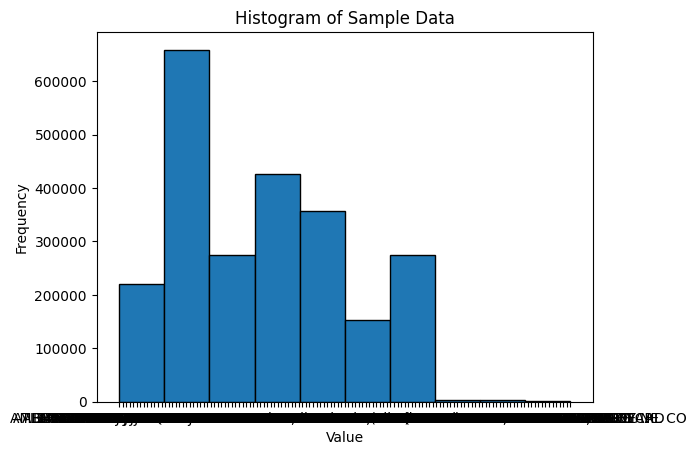

In [31]:
# Create a histogram
plt.hist(df['VendorName'], bins=10, edgecolor='black')

# Add titles and labels
plt.title('Histogram of Sample Data')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Display the histogram
plt.show()

### Lead time

In [72]:
# Calculate the cumulative percentage of Lead Time
df['Cumulative_LeadTime'] = df['LeadTime'].cumsum() / df['LeadTime'].sum() * 100

# Create a Marplot (Pareto) chart
fig, ax1 = plt.subplots()

# Plot Lead Time as a bar chart
ax1.bar(df['VendorNumber'], df['LeadTime'], color='b')
ax1.set_xlabel('VendorNumber')
ax1.set_ylabel('Lead Time (Days)', color='b')

# Create a second y-axis to plot the cumulative percentage
ax2 = ax1.twinx()
ax2.plot(df['VendorNumber'], df['Cumulative_LeadTime'], color='r', marker='o', linestyle='-')
ax2.set_ylabel('Cumulative Percentage (%)', color='r')

# Display the chart
plt.title('Marplot Analysis by Lead Time')
plt.show()

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x1060c0a00>>
Traceback (most recent call last):
  File "/opt/anaconda3/envs/data-env01/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 
Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x1060c0a00>>
Traceback (most recent call last):
  File "/opt/anaconda3/envs/data-env01/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 


### Inventory Category

### Price